<a href="https://colab.research.google.com/github/kiku3kiku/Proyecto-M7/blob/main/Proyecto_M7_CamilaAcosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# DESARROLLO

De los datasets entregados, trabajaré con el segundo. Reviews de aplicaciones de Google Play Store.

### LIBRERIAS

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data = pd.read_csv('googleplaystore_user_reviews.csv')

## ANALISIS Y LIMPIEZA

In [17]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [18]:
data.shape

(64295, 5)

In [19]:
data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [20]:
data.drop(columns=['App', 'Sentiment_Polarity','Sentiment_Subjectivity'], inplace=True)

Eliminamos las columnas 'App', 'Sentiment_Polarity' y 'Sentiment_Subjectivity' porque nos aportan en nuestro trabajo

In [21]:
data.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Translated_Review  37427 non-null  object
 1   Sentiment          37432 non-null  object
dtypes: object(2)
memory usage: 1004.7+ KB


In [23]:
data.isnull().sum()

,0
Translated_Review,26868
Sentiment,26863


Podemos ver que tenemos muchos valores nulos, por lo que eliminaremos todas las filas a las que le falten datos. No imputaremos los datos ya que carece de sentido para nuestro análisis

In [24]:
data= data.dropna()

data.isnull().sum()

,0
Translated_Review,0
Sentiment,0


In [25]:
data.shape

(37427, 2)

In [26]:
data['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


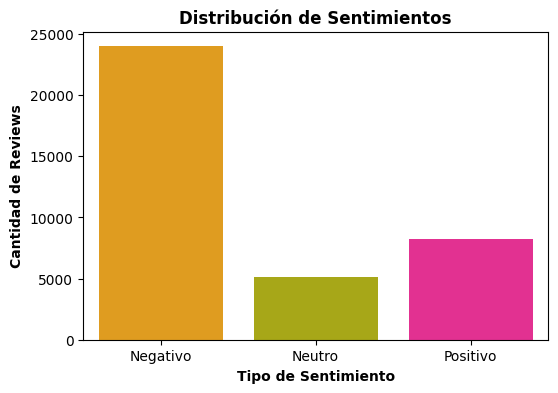

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=data, hue='Sentiment', palette= ['orange', 'y', 'deeppink'])
plt.xticks([0, 1, 2], ['Negativo', 'Neutro', 'Positivo'])
plt.xlabel('Tipo de Sentimiento', fontweight='bold')
plt.ylabel('Cantidad de Reviews', fontweight='bold')
plt.title('Distribución de Sentimientos', fontweight='bold')
plt.show()

### LIMPIEZA DE TEXTO

In [28]:
stop_words = set(stopwords.words('english'))

def limpiar_texto(texto):
  texto = texto.lower() # Convertir a minúsculas
  texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE) # Eliminar URLs
  texto = re.sub(r'\d+', '', texto) # Eliminar números
  texto = re.sub(r'\W', ' ', texto) # Reemplazar caracteres especiales (signos de puntuación) por espacios
  texto = re.sub(r'\s+', ' ',texto).strip() # Eliminar espacios extra

  # Separar en palabras, eliminar stopwords y volver a unirlas
  words = texto.split()
  words = [word for word in words if word not in stop_words]

  return ' '.join(words) # Reconstruir el texto limpio

In [29]:
data['tokens'] = data['Translated_Review'].astype(str).apply(limpiar_texto)

In [30]:
data.head()

,Translated_Review,Sentiment,tokens
0,I like eat delicious food. That's I'm cooking ...,Positive,like eat delicious food cooking food case best...
1,This help eating healthy exercise regular basis,Positive,help eating healthy exercise regular basis
3,Works great especially going grocery store,Positive,works great especially going grocery store
4,Best idea us,Positive,best idea us
5,Best way,Positive,best way


In [31]:
encoder = LabelEncoder()
data['Sentiment_encoded'] = encoder.fit_transform(data['Sentiment'])

print(encoder.classes_)

['Negative' 'Neutral' 'Positive']


In [32]:
print(data[['Sentiment', 'Sentiment_encoded']].value_counts())

Sentiment  Sentiment_encoded
Positive   2                    23998
Negative   0                     8271
Neutral    1                     5158
Name: count, dtype: int64


In [33]:
data.head()

,Translated_Review,Sentiment,tokens,Sentiment_encoded
0,I like eat delicious food. That's I'm cooking ...,Positive,like eat delicious food cooking food case best...,2
1,This help eating healthy exercise regular basis,Positive,help eating healthy exercise regular basis,2
3,Works great especially going grocery store,Positive,works great especially going grocery store,2
4,Best idea us,Positive,best idea us,2
5,Best way,Positive,best way,2


### NUBE DE PALABRAS

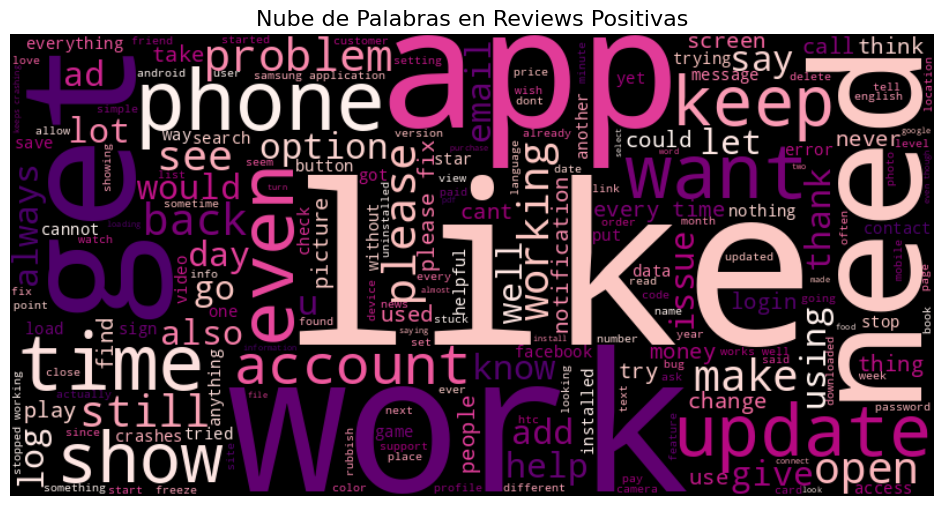

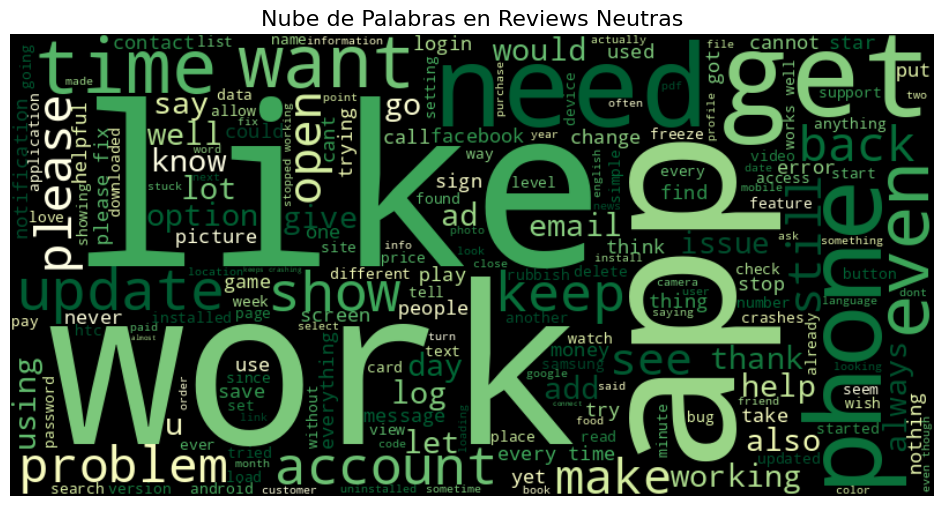

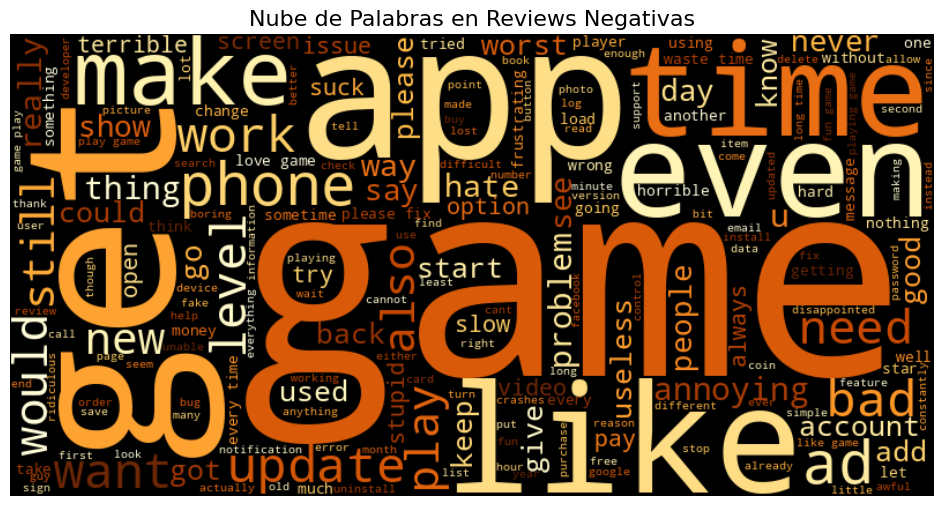

In [34]:
nltk_stopwords = set(stopwords.words('english'))

additional_stopwords = {"http", "https", "RT", "rt", "co", "amp"}
all_stopwords = nltk_stopwords.union(additional_stopwords)

# ---------------------------------------------
# Nube de Palabras para Reviews Positivos (encode = 2)

positive_text = " ".join(data[data["Sentiment_encoded"] == 1]["tokens"].astype(str))

if not positive_text:
    print("No words found in positive reviews after cleaning.")
else:
    wordcloud_positive = WordCloud(
        width=800,
        height=400,
        background_color="black",
        stopwords=all_stopwords,
        colormap="RdPu"
    ).generate(positive_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras en Reviews Positivas", fontsize=16)
    plt.show()

# ---------------------------------------------
# Nube de Palabras para Reviews Neutros (encode = 1)

neutral_text = " ".join(data[data["Sentiment_encoded"] == 1]["tokens"].astype(str))

if not positive_text:
    print("No words found in neutral reviews after cleaning.")
else:
    wordcloud_positive = WordCloud(
        width=800,
        height=400,
        background_color="black",
        stopwords=all_stopwords,
        colormap="YlGn"
    ).generate(positive_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras en Reviews Neutras", fontsize=16)
    plt.show()

# ---------------------------------------------
# Nube de Palabras para Reviews Negativos (encode = 0)

negative_text = " ".join(data[data["Sentiment_encoded"] == 0]["tokens"].astype(str))

if not negative_text:
    print("No words found in negative tweets after cleaning.")
else:
    wordcloud_negative = WordCloud(
        width=800,
        height=400,
        background_color="black",
        stopwords=all_stopwords,
        colormap="YlOrBr"
    ).generate(negative_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_negative, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de Palabras en Reviews Negativas", fontsize=16)
    plt.show()

## PREPARACIÓN DE DATOS

In [35]:
X = data['tokens']  # texto limpio
y = data['Sentiment_encoded']

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## VECTORIZACIÓN

In [36]:
vectorizer = TfidfVectorizer(max_features=5000)

vectorizer.fit(X_train_text)
X_train_vectorized = vectorizer.transform(X_train_text)
X_test_vectorized = vectorizer.transform(X_test_text)

## ENTRENAMIENTO DEL MODELO

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(X_test_vectorized)

In [39]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9118

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1653
           1       0.87      0.84      0.85      1049
           2       0.92      0.97      0.94      4784

    accuracy                           0.91      7486
   macro avg       0.90      0.87      0.88      7486
weighted avg       0.91      0.91      0.91      7486



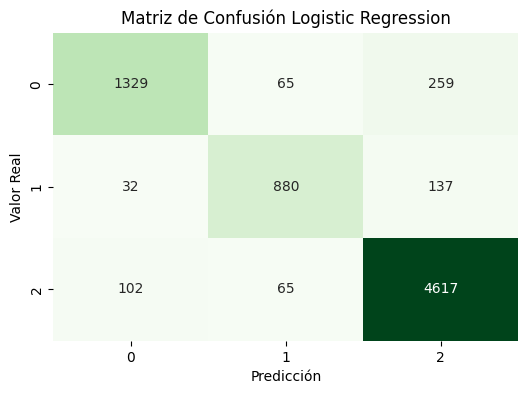

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)

plt.title("Matriz de Confusión Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

/tmp/ipython-input-2637472754.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase', y='f1-score', data=data_clases, palette=colores_personalizados)


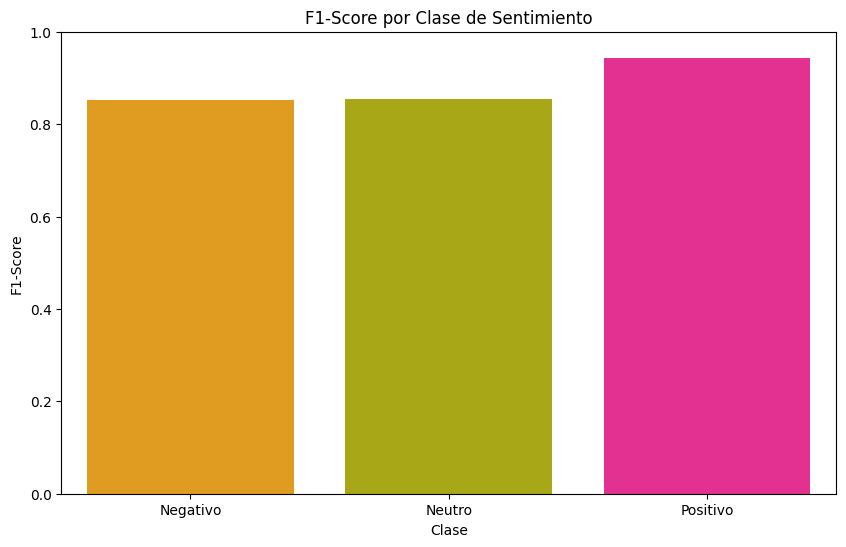

In [41]:
acc_graphic = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True,)).transpose()
data_clases = acc_graphic.loc[['0', '1', '2']].reset_index().rename(columns={'index': 'Clase'})
data_clases['Clase'] = data_clases['Clase'].map({'0': 'Negativo', '1': 'Neutro', '2': 'Positivo'})

plt.figure(figsize=(10, 6))

colores_personalizados = ['Orange', 'y', 'Deeppink']
sns.barplot(x='Clase', y='f1-score', data=data_clases, palette=colores_personalizados)
plt.title('F1-Score por Clase de Sentimiento')
plt.ylabel('F1-Score')
plt.ylim(0.0, 1.0)
plt.show()

Probamos otro modelo para ver cual tiene un mejor rendimiento

In [42]:
from sklearn.naive_bayes import MultinomialNB

modelo_nb = MultinomialNB()
modelo_nb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [43]:
y_pred_nb = modelo_nb.predict(X_test_vectorized)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.7384

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.43      0.58      1653
           1       0.86      0.09      0.17      1049
           2       0.72      0.99      0.83      4784

    accuracy                           0.74      7486
   macro avg       0.82      0.50      0.53      7486
weighted avg       0.78      0.74      0.68      7486



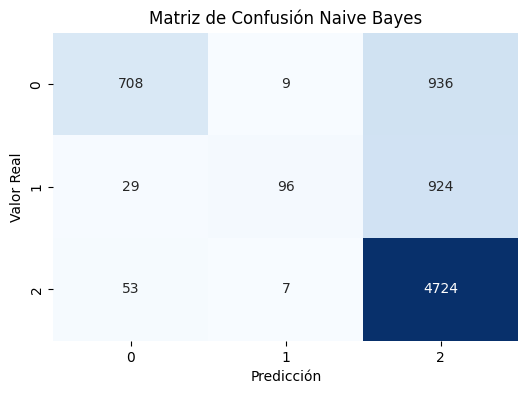

In [47]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title("Matriz de Confusión Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

/tmp/ipython-input-412376816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase', y='f1-score', data=data_clases, palette=colores_personalizados)


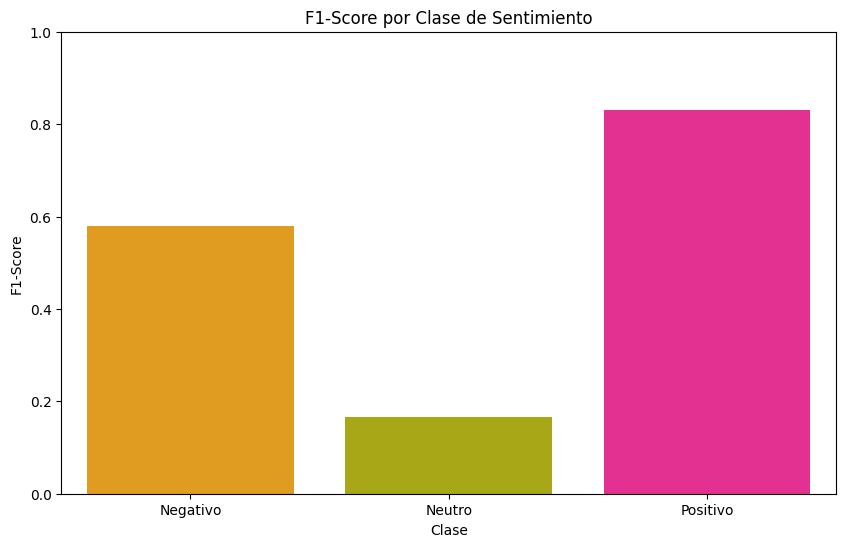

In [45]:
acc_graphic = pd.DataFrame(classification_report(y_test, y_pred_nb, output_dict=True,)).transpose()
data_clases = acc_graphic.loc[['0', '1', '2']].reset_index().rename(columns={'index': 'Clase'})
data_clases['Clase'] = data_clases['Clase'].map({'0': 'Negativo', '1': 'Neutro', '2': 'Positivo'})

plt.figure(figsize=(10, 6))

colores_personalizados = ['Orange', 'y', 'Deeppink']
sns.barplot(x='Clase', y='f1-score', data=data_clases, palette=colores_personalizados)
plt.title('F1-Score por Clase de Sentimiento')
plt.ylabel('F1-Score')
plt.ylim(0.0, 1.0)
plt.show()

Como podemos ver, el modelo de Logistic Regression tiene un rendimiento mucho mejor en comparacion con Naive Bayes, teniendo un accuracy de 0.91 sobre 0.74.

Guardamos el modelo (Logistic Regression) y el vectorizador.

In [46]:
joblib.dump(model, 'modelo_sentimientos.pkl')

joblib.dump(vectorizer, 'vectorizador_tfidf.pkl')

['vectorizador_tfidf.pkl']